In [1]:
import os

os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm.auto as tqdm
from urbanstats.games.quiz_analysis import get_dau

/home/kavi/anaconda3/envs/urbanstats/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
plt.rcParams["font.family"] = "monospace"

In [5]:
xs, ys, ys_rolling = get_dau()

In [6]:
def for_dow(dow):
    return ys[(xs - 1) % 7 == dow]

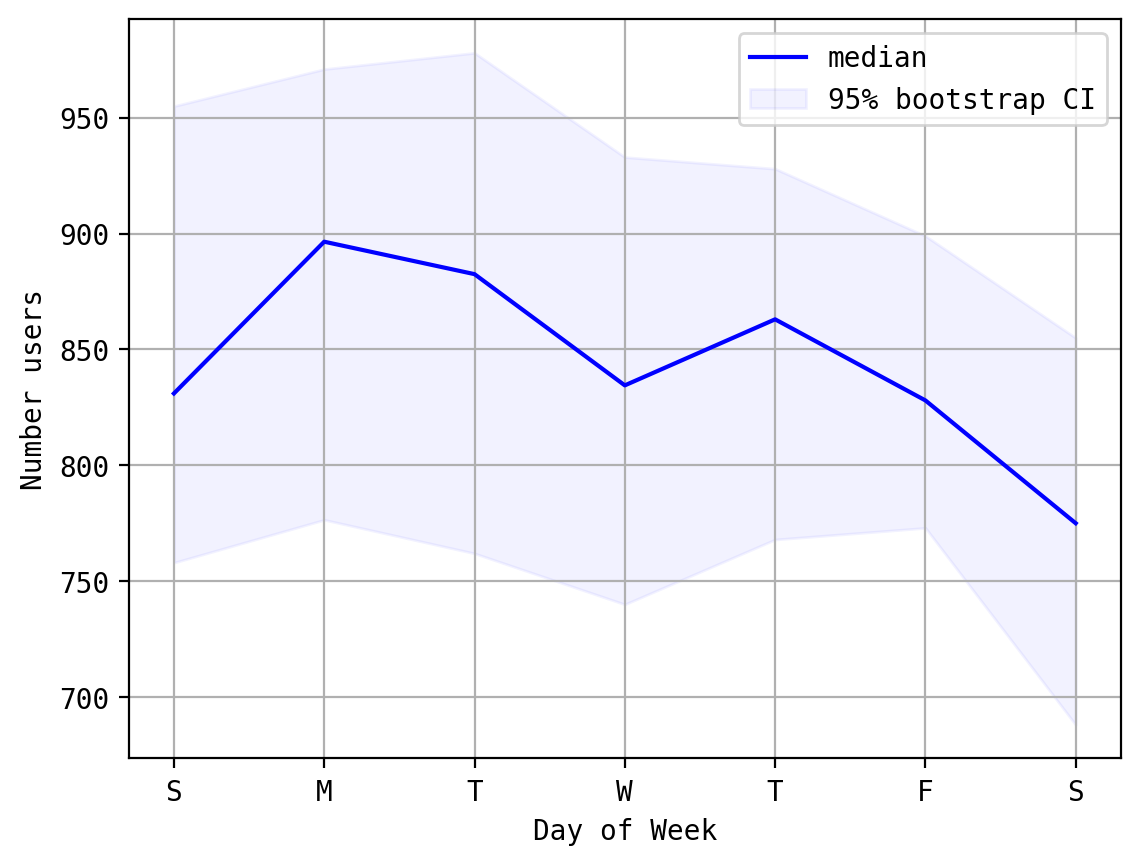

In [7]:
def summary_stats(ys):
    bootstrap = np.median(np.random.RandomState(0).choice(ys, replace=True, size=(10000, ys.shape[0])), 1)
    return np.percentile(bootstrap, [2.5, 50, 97.5])
lo, me, hi = np.array([summary_stats(for_dow(dow)) for dow in range(7)]).T
plt.figure(dpi=200)
x = np.arange(7)
plt.plot(x, me, color="blue", label="median")
plt.fill_between(x, lo, hi, color="blue", alpha=0.05, label="95% bootstrap CI")
plt.xticks(x, list("SMTWTFS"))
plt.ylabel("Number users")
plt.xlabel("Day of Week")
plt.legend()
plt.grid()
plt.show()

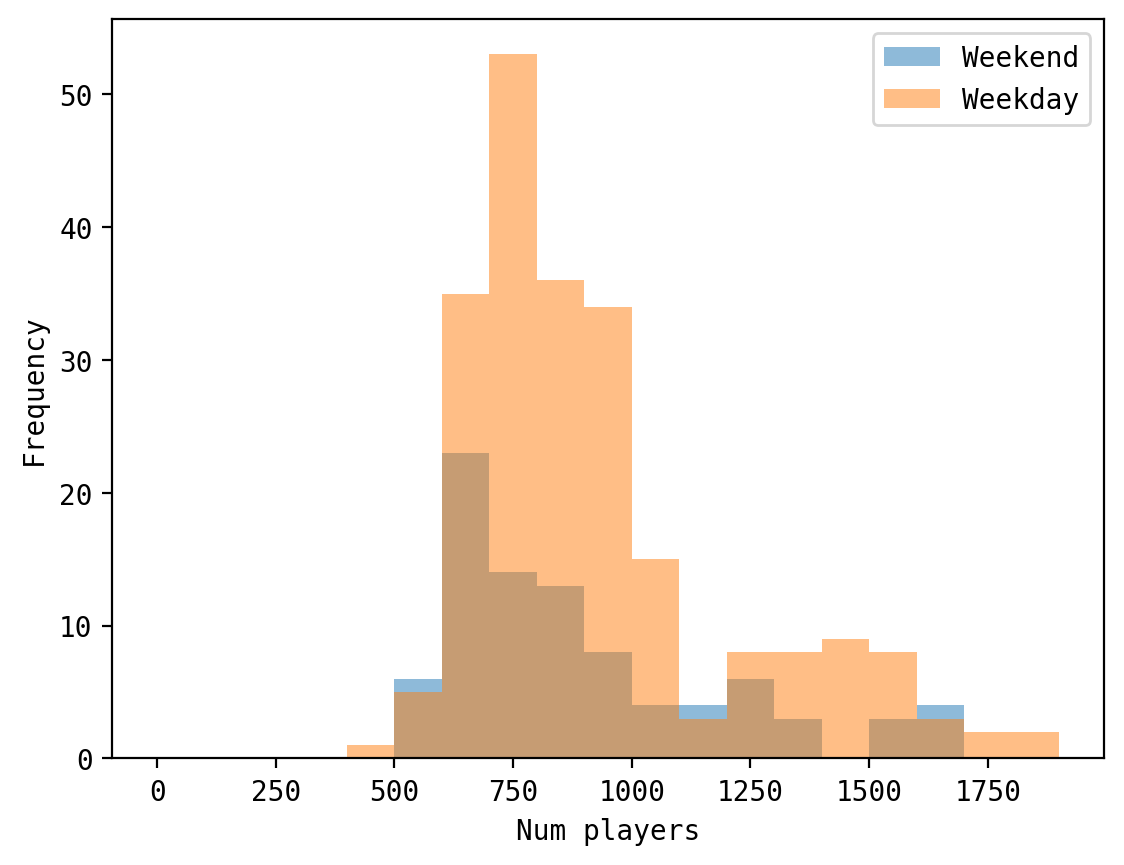

In [8]:
plt.figure(dpi=200, facecolor="white")
bins = np.arange(0, 2000, 100)
plt.hist([x for dow in [0, 6] for x in for_dow(dow)], bins=bins, alpha=0.5, label="Weekend")
plt.hist([x for dow in range(1, 1 + 5) for x in for_dow(dow)], bins=bins, alpha=0.5, label="Weekday")
plt.legend()
plt.xlabel("Num players")
plt.ylabel("Frequency")
plt.show()